In [20]:

import math
import random
import os
from PIL import Image, ImageDraw


# Define the folder to save the images in
folder_name = "shapes_images"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Define the shapes to be generated
shapes = ["circle", "non-circle1", "non-circle2", "non-circle3", "non-circle4"]

# Define the dimensions of the images
width = 256
height = 256

# Define the number of images to generate for each shape
num_images_per_shape = 500

# Generate the images
for shape in shapes:
    for i in range(num_images_per_shape):
        # Create a new image with a white background
        img = Image.new('RGB', (width, height), color='white')
        
        # Create a drawing object
        draw = ImageDraw.Draw(img)
        
        # Define the shape's size and position
        shape_size = random.randint(int(width*0.1), int(width*0.5))
        x1 = random.randint(0, width - shape_size)
        y1 = random.randint(0, height - shape_size)
        x2 = x1 + shape_size
        y2 = y1 + shape_size
        
        # Draw the shape on the image
        if shape == "circle":
            radius = shape_size // 2
            x_center = x1 + radius
            y_center = y1 + radius
            for x in range(x1, x2):
                for y in range(y1, y2):
                    if math.sqrt((x - x_center)**2 + (y - y_center)**2) <= radius:
                        draw.point((x, y), fill='black')
        elif shape == "non-circle1":
            for x in range(x1, x2):
                for y in range(y1, y2):
                    draw.point((x, y), fill='black')
        elif shape == "non-circle2":
            x_center = (x1 + x2) // 2
            y_center = (y1 + y2) // 2
            top_point = (x_center, y1)
            left_point = (x1, y2)
            right_point = (x2, y2)
            points = [top_point, left_point, right_point]
            draw.polygon(points, fill='black')
        elif shape == "non-circle3":
            x_center = (x1 + x2) // 2
            y_center = (y1 + y2) // 2
            radius = (y_center - y1) // 2
            angle = 2 * math.pi / 5
            points = [(x_center + int(radius * math.cos(i * angle)), y_center + int(radius * math.sin(i * angle))) for i in range(5)]
            draw.polygon(points, fill='black')
        elif shape == "non-circle4":
            x_center = (x1 + x2) // 2
            y_center = (y1 + y2) // 2
            radius = (y_center - y1) // 2
            angle = 2 * math.pi / 6
            points = [(x_center + int(radius * math.cos(i * angle)), y_center + int(radius * math.sin(i * angle))) for i in range(6)]
            draw.polygon(points, fill='black')
        
        # Save the image to a file
        img.save(f"{folder_name}/{shape}_{i}.png")


KeyboardInterrupt: 

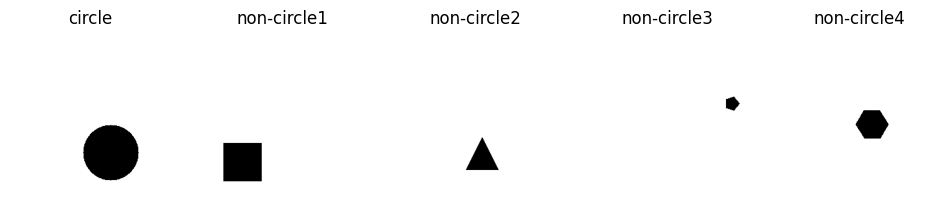

In [ ]:

from PIL import Image
import matplotlib.pyplot as plt

# Define the folder where the images are saved
folder_name = "shapes_images"

# Define the shapes to be displayed
shapes = ["circle", "non-circle1", "non-circle2", "non-circle3", "non-circle4"]

# Define the figure and subplot settings
fig = plt.figure(figsize=(12, 6))
columns = 5
rows = 1

# Loop through the shapes and display an example of each
for i, shape in enumerate(shapes):
    # Find the path to the first image of the current shape
    shape_files = os.listdir(folder_name)
    shape_file = [file for file in shape_files if file.startswith(shape)][1]
    image_path = os.path.join(folder_name, shape_file)
    
    # Load the image
    image = Image.open(image_path)
    
    # Display the image with its label
    ax = fig.add_subplot(rows, columns, i+1)
    ax.imshow(image)
    ax.set_title(shape)
    ax.axis('off')

plt.show()


In [ ]:
import os

folder_path = "/Users/jgber/OneDrive/Desktop/shapegenerator/shapes_images/"
prefix = "non-circle"

count = 1
for filename in os.listdir(folder_path):
    if filename.startswith(prefix):
        src = folder_path + filename
        dst = folder_path + prefix + str(count) + filename[len(prefix):]
        os.rename(src, dst)
        count += 1


In [ ]:
import os
import shutil

# specify the input folder path
input_folder = "/Users/jgber/OneDrive/Desktop/shapegenerator/shapes_images/"

# specify the output subfolders for each category
output_folder_circle = "circle"
output_folder_non_circle = "non_circle"

# create the output subfolders if they don't exist
os.makedirs(output_folder_circle, exist_ok=True)
os.makedirs(output_folder_non_circle, exist_ok=True)

# iterate over all files in the input folder
for filename in os.listdir(input_folder):
    # check if the filename starts with "circle"
    if filename.startswith("circle"):
        # move the file to the output subfolder for circle images
        shutil.move(os.path.join(input_folder, filename), output_folder_circle)
    # check if the filename starts with "non-circle"
    elif filename.startswith("non-circle"):
        # move the file to the output subfolder for non-circle images
        shutil.move(os.path.join(input_folder, filename), output_folder_non_circle)
    else:
        # ignore files that don't match either pattern
        pass


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/jgber/OneDrive/Desktop/shapegenerator/shapes_images/'

In [42]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the folders containing the images of circles and non-circles
circle_folder = '/Users/jgber/OneDrive/Desktop/shapegenerator/circle'
non_circle_folder = '/Users/jgber/OneDrive/Desktop/shapegenerator/non_circle'

# Create an empty list to store the images and their labels
data = []
labels = []

# Load the images from the circle folder and append them to the data list with a label of 0 (for circle)
for img_name in os.listdir(circle_folder):
    img_path = os.path.join(circle_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (50, 50))
    data.append(img)
    labels.append(0)

# Load the images from the non-circle folder and append them to the data list with a label of 1 (for non-circle)
for img_name in os.listdir(non_circle_folder):
    img_path = os.path.join(non_circle_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (50, 50))
    data.append(img)
    labels.append(1)

# Convert the data and labels lists to numpy arrays
data = np.array(data) / 255.0
labels = np.array(labels)

# Split the data and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train.reshape(-1, 50, 50, 1), y_train, epochs=10, validation_data=(X_test.reshape(-1, 50, 50, 1), y_test))


Epoch 1/10
63/63 [==============================] - 4s 52ms/step - loss: 0.5105 - accuracy: 0.7880 - val_loss: 0.4931 - val_accuracy: 0.8000
Epoch 2/10
63/63 [==============================] - 3s 50ms/step - loss: 0.3453 - accuracy: 0.8710 - val_loss: 0.2590 - val_accuracy: 0.9060
Epoch 3/10
63/63 [==============================] - 3s 51ms/step - loss: 0.2286 - accuracy: 0.9195 - val_loss: 0.2027 - val_accuracy: 0.9320
Epoch 4/10
63/63 [==============================] - 3s 48ms/step - loss: 0.1853 - accuracy: 0.9365 - val_loss: 0.1991 - val_accuracy: 0.9240
Epoch 5/10
63/63 [==============================] - 3s 48ms/step - loss: 0.1502 - accuracy: 0.9465 - val_loss: 0.1465 - val_accuracy: 0.9520
Epoch 6/10
63/63 [==============================] - 3s 47ms/step - loss: 0.1191 - accuracy: 0.9575 - val_loss: 0.1402 - val_accuracy: 0.9460
Epoch 7/10
63/63 [==============================] - 3s 47ms/step - loss: 0.0925 - accuracy: 0.9710 - val_loss: 0.0978 - val_accuracy: 0.9620
Epoch 8/10
63

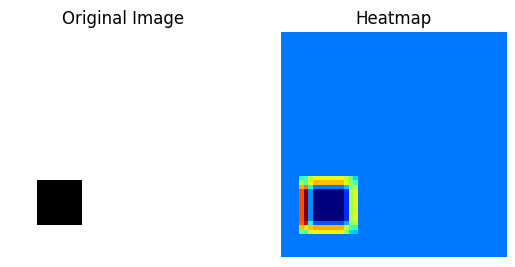

In [76]:
import cv2
import matplotlib.pyplot as plt

def generate_heatmap(model, img_tensor):
    # Get the last convolutional layer of the model
    last_conv_layer = model.get_layer('conv2d_92')

    # Create a model that outputs the last convolutional layer and the output of the model
    last_conv_model = tf.keras.models.Model(model.inputs, [last_conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = last_conv_model(img_tensor)
        # Get the index corresponding to the predicted class
        class_idx = tf.argmax(predictions[0])
        # Compute the loss between the predicted class and the output of the last convolutional layer
        loss = predictions[:, class_idx]

    # Get the gradients of the loss with respect to the output of the last convolutional layer
    grads = tape.gradient(loss, conv_output)

    # Compute the mean of the gradients along each channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by its corresponding gradient score
    last_conv_layer_output = conv_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Apply ReLU to the heatmap to remove any negative values
    heatmap = tf.maximum(heatmap, 0)

    # Normalize the heatmap
    heatmap /= tf.reduce_max(heatmap)

    return heatmap.numpy()

# Choose a random image from the test set
img_tensor = X_test[19].reshape(-1, 50, 50, 1)

# Generate the heatmap for the chosen image
heatmap = generate_heatmap(model, img_tensor)

# Resize the heatmap to the size of the original image
heatmap = cv2.resize(heatmap, (50, 50))

# Display the heatmap and the original image
plt.subplot(1, 2, 1)
plt.imshow(img_tensor[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(heatmap, cmap='jet')
plt.axis('off')
plt.title('Heatmap')

plt.show()


In [39]:
X_test.size


1250000

In [40]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 4, 128)       

In [9]:
import matplotlib.pyplot as plt
import os

# Get the weights for each layer in the model
weights = model.get_weights()

# Define a function to save the weight images with labels
def save_weight_images(weights, layer_name):
    if not os.path.exists(layer_name):
        os.makedirs(layer_name)
    for i, w in enumerate(weights):
        if len(w.shape) == 4:
            # For convolutional layers, plot each filter as a separate heatmap
            num_filters = w.shape[3]
            for j in range(num_filters):
                fig, ax = plt.subplots(figsize=(12, 12))
                ax.imshow(w[:, :, 0, j], cmap='viridis')
                ax.axis('off')
                filename = f'{layer_name}/filter_{j}.png'
                plt.savefig(filename)
                plt.close(fig)
        elif len(w.shape) == 2:
            # For dense layers, plot the weights as a single heatmap
            fig, ax = plt.subplots(figsize=(12, 12))
            ax.imshow(w, cmap='viridis')
            ax.axis('off')
            filename = f'{layer_name}/weights.png'
            plt.savefig(filename)
            plt.close(fig)

# Save the weight images for each layer
for i, w in enumerate(weights):
    if len(w.shape) == 4:
        # For convolutional layers, save each filter as a separate image
        layer_name = f'conv_layer_{i}'
        save_weight_images([w], layer_name)
    elif len(w.shape) == 2:
        # For dense layers, save the weights as a single image
        layer_name = f'dense_layer_{i}'
        save_weight_images([w], layer_name)


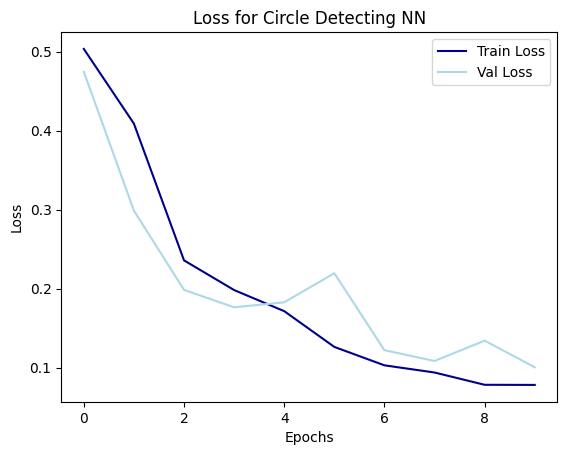

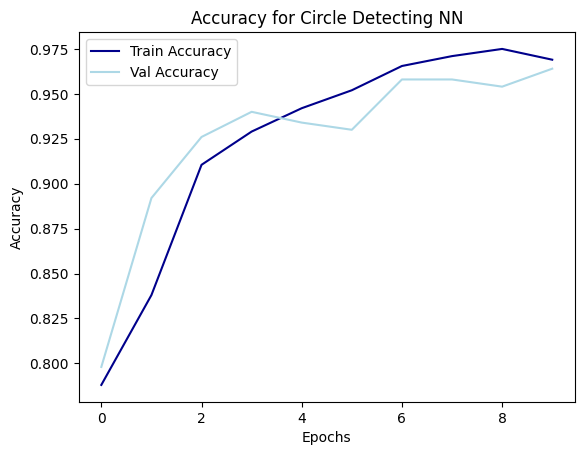

In [ ]:
import matplotlib.pyplot as plt
# Save the node weights as an h5 file
model.save_weights('node_weights.h5')

# Train the model and save the history of the training
# Plot the loss function over epochs
plt.plot(history.history['loss'], label='Train Loss', color='darkblue')
plt.plot(history.history['val_loss'], label='Val Loss', color='lightblue')
plt.title('Loss for Circle Detecting NN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy function over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy', color='darkblue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='lightblue')
plt.title('Accuracy for Circle Detecting NN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Predict on the first five images in the test set
predictions = model.predict(X_test[:50].reshape(-1, 50, 50, 1))
predicted_labels = np.round(predictions).flatten()

# Display the predicted and actual labels for the first five images
for i in range(50):
    print(f"Predicted: {predicted_labels[i]}, Actual: {y_test[i]}")


2/2 [==============================] - 0s 16ms/step
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 0.0, Actual: 0
Predicted: 1.0, Actual: 1
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 0
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 0.0, Actual: 0
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 0.0, Actual: 0
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 0.0, Actual: 0
Predicted: 0.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1.0, Actual: 1
Predicted: 1

In [ ]:
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
import visualkeras

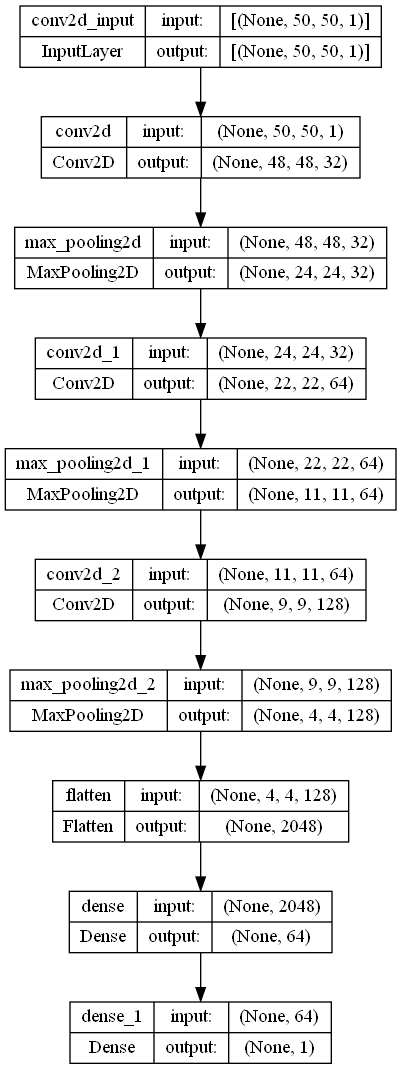

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

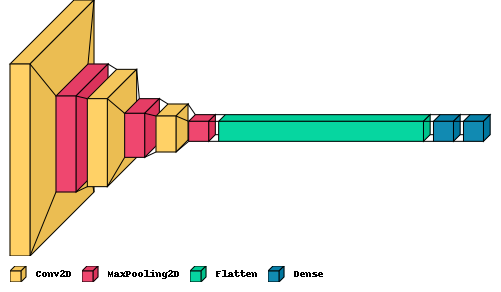

In [ ]:
from collections import defaultdict
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = '#00bfff' # light blue
color_map[ZeroPadding2D]['fill'] = '#1e90ff' # medium blue
color_map[Dropout]['fill'] = '#4169e1' # dark blue
color_map[MaxPooling2D]['fill'] = '#6495ed' # pale blue
color_map[Dense]['fill'] = '#87ceeb' # sky blue
color_map[Flatten]['fill'] = '#add8e6' # light steel blue

visualkeras.layered_view(model, legend=True, color_map=color_map)

In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model

from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models

import tensorflow as tf
import numpy as np

image_size = 224

# Load pre-trained Keras model and the image to classify
model = model
image = np.random.random((image_size, image_size, 3))
img_tensor = preprocessing.image.img_to_array(image)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = preprocess_input(img_tensor)

conv_layer = model.get_layer("conv2d_18")
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

# Get gradient of the winner class w.r.t. the output of the (last) conv. layer
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(img_tensor)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)

hm=np.squeeze(heatmap)
hm.shape
plt.imshow(hm)


NameError: name 'model' is not defined

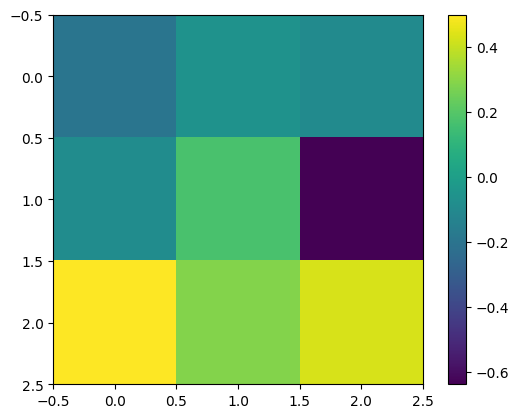

In [27]:
import matplotlib.pyplot as plt

# Get the weights of the first convolutional layer
weights = model.layers[0].get_weights()[0]

# Reshape the weights to 4D tensor
weights = np.reshape(weights, (3, 3, 1, 32))

# Normalize the weights to values between 0 and 1
weights = weights / np.max(weights)

# Create a heatmap of the weights
plt.imshow(weights[:,:,0,0], cmap='viridis')
plt.colorbar()
plt.show()


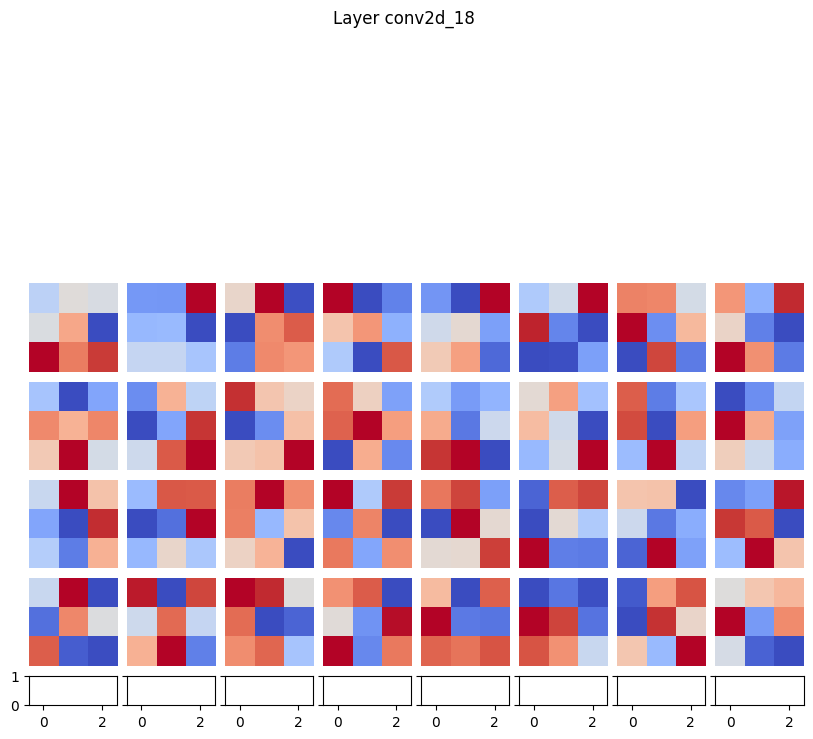

IndexError: list index out of range

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# Iterate over all the layers in the model
for layer in model.layers:
    # Check if the layer has weights
    if hasattr(layer, 'get_weights'):
        # Get the weights of the layer
        weights = layer.get_weights()[0]
        # Check if the layer is a convolutional layer
        if len(weights.shape) == 4:
            # Reshape the weights to 4D tensor
            weights = np.reshape(weights, (weights.shape[0], weights.shape[1], weights.shape[2]*weights.shape[3]))
            # Normalize the weights to values between 0 and 1
            weights = weights / np.max(weights)
            # Create a figure with subplots of different sizes
            fig = plt.figure(figsize=(10, 10))
            grid = ImageGrid(fig, 111,  # similar to subplot(111)
                             nrows_ncols=(weights.shape[-1]//8 + 1, 8),  # creates 8 columns of subplots
                             axes_pad=0.1,  # pad between axes in inch.
                             )
            # Display a heatmap for each filter in the layer
            for i in range(weights.shape[-1]):
                grid[i].imshow(weights[:,:,i], cmap='coolwarm')
                grid[i].axis('off')
            fig.suptitle(f'Layer {layer.name}')
            plt.show()


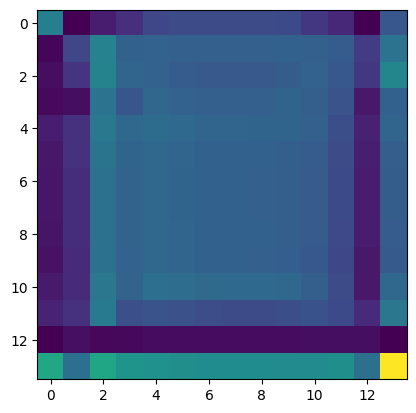

In [ ]:
import matplotlib.pyplot as plt
hm=np.squeeze(heatmap)
hm.shape
plt.imshow(hm)


In [39]:
weights = model.layers[4].get_weights()[0].T
plt.figure(figsize=(10, 8))
weights = weights.reshape(3, 3, 1, 64)
weights = np.tile(weights, (1, 1, 32, 1))
weights = weights.reshape(3*32, 3*64)
weights = weights / np.max(weights)
plt.imshow(weights, cmap='coolwarm')
plt.colorbar()
plt.title('Weights of Second Layer')
plt.show()


ValueError: cannot reshape array of size 73728 into shape (3,3,1,64)

<Figure size 1000x800 with 0 Axes>

In [19]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 4, 128)       